<a href="https://colab.research.google.com/github/AEE099/heart_disease_evaluacion_metricas/blob/main/evaluacion_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Context and Primary Metric
### 🩺 Case Study: Heart Disease Diagnosis
In this project, we work with a clinical dataset containing variables related to cardiovascular health. The goal is to build a classification model that predicts whether a patient shows signs of heart disease.

This type of problem is critical in medical contexts, as misclassification can have serious consequences:

- **False Negatives (FN):** Patients with disease not detected → high clinical risk.
- **False Positives (FP):** Healthy patients misdiagnosed → unnecessary costs and anxiety.
---

### 🎯 Primary Metric

- **Recall (Sensitivity):**  
  Our priority is to **maximize the detection of positive cases** (disease presence).  
  
---
### 📊 Supporting Metrics

- **Precision:** To avoid excessive false positives.
- **F1 Score:** Balances precision and recall.
- **ROC AUC:** Measures overall ability to distinguish between classes.
- **Confusion Matrix:** Visualizes Type I and Type II errors.
- **ROC and PR Curves:** Evaluate performance across different thresholds.

---

### 🧠 Justification

In a clinical setting, **recall is the most critical metric**, as missing a diagnosis can lead to severe consequences. However, supporting metrics are also monitored to avoid overfitting or unnecessary interventions.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


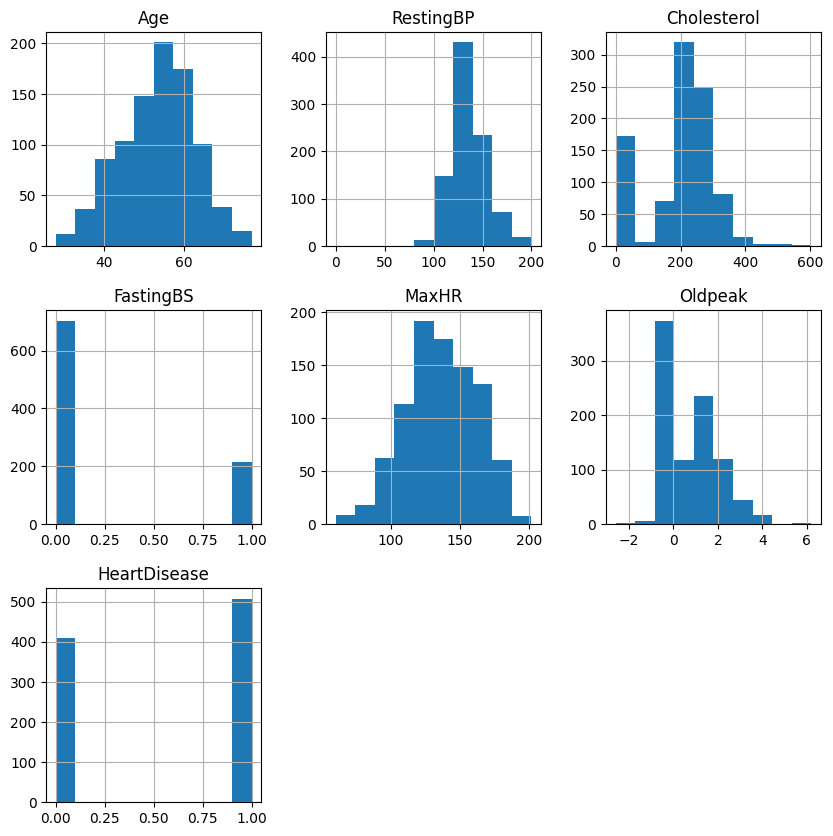

In [ ]:
#Load and prepare data

df=pd.read_csv('heart.csv')
df.head()
df.info()
df.hist(figsize=(10,10))
plt.show()


In [ ]:
#Encode string category for better undestanding for the model
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df = pd.get_dummies(df, columns=["ChestPainType"], drop_first=True)
df = pd.get_dummies(df, columns=["RestingECG"], drop_first=True)
df = pd.get_dummies(df, columns=["ExerciseAngina"], drop_first=True)
df = pd.get_dummies(df, columns=["ST_Slope"], drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
x=df.drop("HeartDisease", axis=1)
y=df["HeartDisease"]

#Train-tes-split
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=42)
#Scaler feature
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)
#Define models

models={"Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost" : xgb.XGBClassifier(use_label_encoder=False,
                                      eval_metric='logloss'),
        "SVM": SVC (probability=True)  }

#Evaluation models
results=[]

for name, model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred= model.predict(x_test_scaled)
  y_proba= model.predict_proba(x_test_scaled)[:,1]

  results.append({
      "Model":name,
      "Accuracy":accuracy_score(y_test,y_pred),
      "Precision":precision_score(y_test,y_pred),
      "Recall":recall_score(y_test,y_pred),
      "F1 Score":f1_score(y_test,y_pred),
      "ROC AUC":roc_auc_score(y_test,y_proba)
  })

#Create summary table

benchmark_df=pd.DataFrame(results).round(3)
print(benchmark_df)

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression     0.883      0.873   0.921     0.897    0.932
1        Random Forest     0.896      0.893   0.921     0.907    0.944
2              XGBoost     0.870      0.876   0.890     0.883    0.933
3                  SVM     0.904      0.895   0.937     0.915    0.949


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:33:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#Matriz Confutio.
from sklearn.metrics import confusion_matrix

# Get the trained SVM model and scaled test data
svm_model = models["SVM"]
#Predictions of the SVM model
y_pred = svm_model.predict(x_test_scaled)

#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
tn, fp, fn, tp=cm.ravel()

print(f"True Positives: Patient correctly identified as having heart disease:{tp}")
print(f"False Positives:Healthy patient incorrectly flagged as diseased: {fp}")
print(f"True Negatives:  Healthy patient correctly identified as healthy: {tn}")
print(f"False Negatives: Healthy patient incorrectly flagged as diseased:{fn}")

True Positives: Patient correctly identified as having heart disease:119
False Positives:Healthy patient incorrectly flagged as diseased: 14
True Negatives:  Healthy patient correctly identified as healthy: 89
False Negatives: Healthy patient incorrectly flagged as diseased:8


In [ ]:
# Calculate metrics using the confusion matrix values
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1_score:.3f}")
print
#Compare result with benchmark result.
print(f"benchmark result:\n", benchmark_df[benchmark_df["Model"] == "SVM"])

Precision: 0.895
Recall: 0.937
Accuracy: 0.904
F1 Score: 0.915
benchmark result:
   Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
3   SVM     0.904      0.895   0.937     0.915    0.949


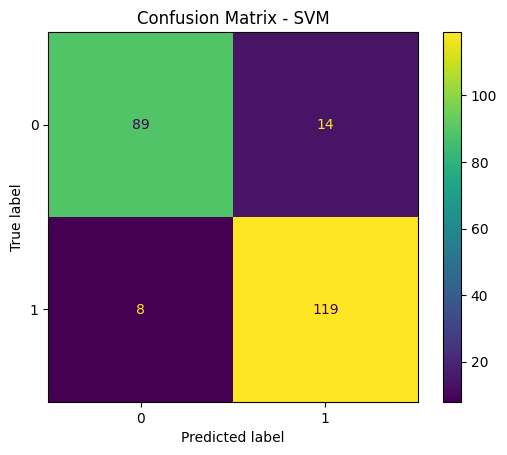

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, x_test_scaled, y_test)
plt.title("Confusion Matrix - SVM")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


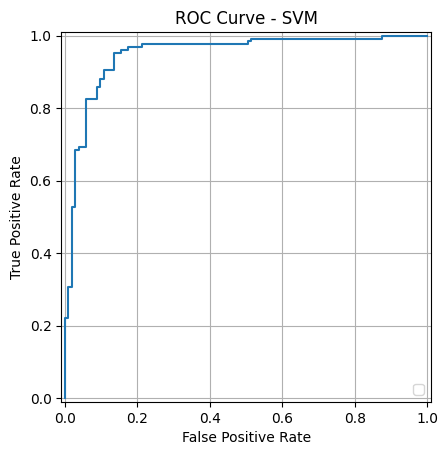

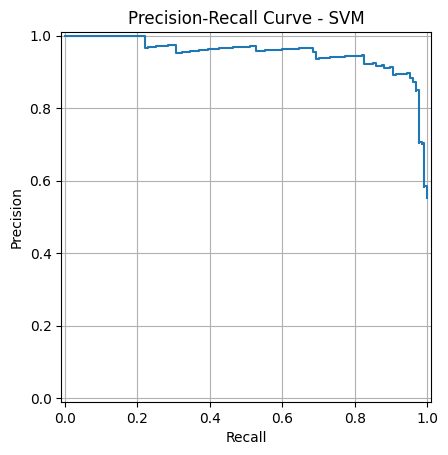

In [ ]:
# ROC y Precision–Recall , PR

from sklearn.metrics import roc_curve , precision_recall_curve, RocCurveDisplay,PrecisionRecallDisplay

#Make sure your SVM model training with probability
y_proba= svm_model.predict_proba(x_test_scaled)[:,1]

fpr,tpr, thresholds_roc= roc_curve(y_test,y_proba)
roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()


#Plot precision- Recall curve

precision, recall, thresholds_pr= precision_recall_curve(y_test,y_proba)
pr_display=PrecisionRecallDisplay(precision=precision,recall=recall).plot()
plt.title("Precision-Recall Curve - SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

In [ ]:
#Define threshold to test
thresholds= (0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9 ,1.0)

#Initialize results list

results=[]
#Loop through thresholds and calculate metrics

for t in thresholds:
  y_thresh= (y_proba >= t). astype(int) # Apply threshold to probabilities

  from sklearn.metrics import precision_score, recall_score, f1_score # Explicitly import within the loop

  precision = precision_score(y_test,y_thresh)
  recall = recall_score(y_test,y_thresh)
  f1 = f1_score(y_test,y_thresh)
  review_rate= y_thresh.mean() # % of patients flagged (TP + FP) / total

  results.append({
      "Threshold" : round(t,2),
      "Precision": round(precision,3),
      "Recall": round(recall,3),
      "F1 Score": round(f1,3),
      "Review Rate": round(review_rate,3)
  })

  thresholds_df= pd.DataFrame(results)
  print(thresholds_df)

   Threshold  Precision  Recall  F1 Score  Review Rate
0        0.1      0.705   0.976     0.818        0.765
   Threshold  Precision  Recall  F1 Score  Review Rate
0        0.1      0.705   0.976     0.818        0.765
1        0.2      0.785   0.976     0.870        0.687
   Threshold  Precision  Recall  F1 Score  Review Rate
0        0.1      0.705   0.976     0.818        0.765
1        0.2      0.785   0.976     0.870        0.687
2        0.3      0.844   0.976     0.905        0.639
   Threshold  Precision  Recall  F1 Score  Review Rate
0        0.1      0.705   0.976     0.818        0.765
1        0.2      0.785   0.976     0.870        0.687
2        0.3      0.844   0.976     0.905        0.639
3        0.4      0.878   0.961     0.917        0.604
   Threshold  Precision  Recall  F1 Score  Review Rate
0        0.1      0.705   0.976     0.818        0.765
1        0.2      0.785   0.976     0.870        0.687
2        0.3      0.844   0.976     0.905        0.639
3        0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


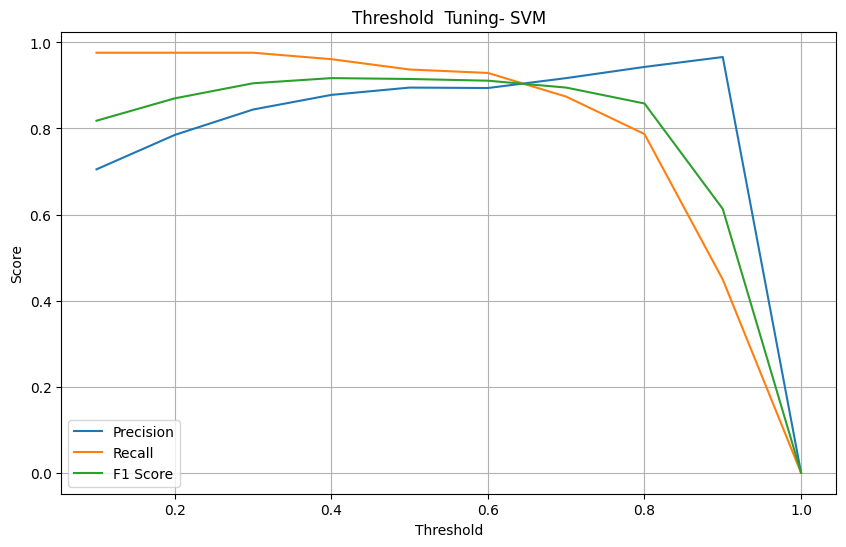

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(thresholds_df["Threshold"], thresholds_df["Precision"], label="Precision")
plt.plot(thresholds_df["Threshold"], thresholds_df["Recall"], label="Recall")
plt.plot(thresholds_df["Threshold"], thresholds_df["F1 Score"], label="F1 Score")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold  Tuning- SVM")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Let's assum this is an stimate cost for FP AND FN

cost_fp=1000
cost_fn= 7500

In [ ]:
#Define threshold to test
thresholds= (0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9 ,1.0)

cost_resutls= []

for t in thresholds:
  y_thresh= (y_proba >= t).astype(int)
  #Confussion matrix
  tn, fp, fn, tp= confusion_matrix(y_test,y_thresh).ravel()

  total_cost= (fp * cost_fp) + (fn * cost_fn)

  cost_resutls.append({
      "umbral": round(t,2),
      "FP": fp,
      "FN": fn,
      "Total cost": total_cost,
      "Total cost per patient" : round(total_cost/ len(y_test),2)
  })

In [ ]:
tabla_costos= pd.DataFrame(cost_resutls)
print(tabla_costos)

   umbral  FP   FN  Total cost  Total cost per patient
0     0.1  52    3       74500                  323.91
1     0.2  34    3       56500                  245.65
2     0.3  23    3       45500                  197.83
3     0.4  17    5       54500                  236.96
4     0.5  14    8       74000                  321.74
5     0.6  14    9       81500                  354.35
6     0.7  10   16      130000                  565.22
7     0.8   6   27      208500                  906.52
8     0.9   2   70      527000                 2291.30
9     1.0   0  127      952500                 4141.30



### Metric and decision context

**Problem definition**  
The task is a binary diagnostic classifier to detect heart disease from clinical features. The operational objective is to identify as many true disease cases as possible while keeping follow-up workload manageable.

**Primary and auxiliary metrics and justification**  
- **Primary metric: Recall (sensitivity).** The priority is to minimize missed disease cases because false negatives have the highest clinical risk.  
- **Auxiliary metrics: Precision, F1 score, and ROC AUC.** Precision captures the rate of unnecessary follow-ups; F1 balances precision and recall for overall trade-offs; ROC AUC summarizes discrimination across thresholds and supports model selection.  
- **Operational metric: Review Rate.** The proportion of patients flagged for additional evaluation (TP + FP) drives downstream capacity and costs.

---

### Chosen threshold and results

**Selected threshold: 0.40** — this threshold strikes a high-recall regime while keeping precision and review rate at operationally acceptable levels.

**Key metrics at threshold 0.40**

| Metric | Value |
|--------|-------|
| **Threshold** | **0.40** |
| **Precision** | **0.878** |
| **Recall** | **0.961** |
| **F1 Score** | **0.917** |
| **ROC AUC** | **0.949** |
| **Review Rate** | **0.604 (60.4%)** |

**Short interpretation**  
- High **recall (0.961)** ensures nearly all true cases are flagged.  
- High **precision (0.878)** limits excessive false alarms relative to many low-threshold choices.  
- **F1 = 0.917** confirms a strong balance between recall and precision.  
- **Review rate ≈ 60%** means about six in ten patients will be routed for further testing or clinician review.

---

### Risks mitigations and economic impact

**Operational and clinical risks**  
- **Residual false negatives:** Although low, any FN carries clinical risk of delayed treatment.  
- **High review load:** ~60% review rate increases clinic workload, waiting times, and use of diagnostic resources.  
- **False positives burden:** Continued FP cases cause unnecessary tests, patient anxiety, and costs.  
- **Model drift and calibration risk:** Performance may degrade over time if population or data collection changes.

**Mitigation strategies**  
- **Monitoring:** Continuously track recall, precision, review rate, and calibration on incoming data; set alerts for metric degradation.  
- **Periodic recalibration and retraining:** Recalibrate probability scores and retrain on newly collected labeled data quarterly or when drift is detected.  
- **Human-in-the-loop review:** Route flagged cases through a rapid secondary triage by clinicians to reduce unnecessary downstream testing.  
- **Threshold re-evaluation:** Recompute the optimal threshold periodically using current costs and capacity constraints.  
- **Stratified thresholds:** Apply different thresholds for subgroups (age, risk strata) if clinically justified to reduce population-level review burden.

**Economic and operational linkage**  
- **Cost trade-off:** Operating at threshold 0.40 lowers clinical risk by minimizing FNs but increases short-term costs through higher review rate and FP-driven testing.  
- **Value justification:** The increased upfront cost of reviews is justified when the avoided cost and harm of missed disease (e.g., advanced treatment, morbidity, malpractice risk) exceed the incremental review cost.  
- **Capacity planning:** Health services must ensure sufficient diagnostic capacity and fast triage pathways to prevent bottlenecks; otherwise delayed follow-up can negate clinical benefits.  
- **Decision rule:** Maintain threshold 0.40 while instituting monitoring, rapid triage, and periodic cost-based re-evaluation; lower threshold only if capacity and cost analyses show net benefit.